---
**Copyright 2026 Adilkhan Salkimbayev**  
Licensed under the Apache License, Version 2.0 (the "License"); you may not use this file except in compliance with the License. You may obtain a copy of the License at [apache.org/licenses/LICENSE-2.0](http://www.apache.org/licenses/LICENSE-2.0).
---

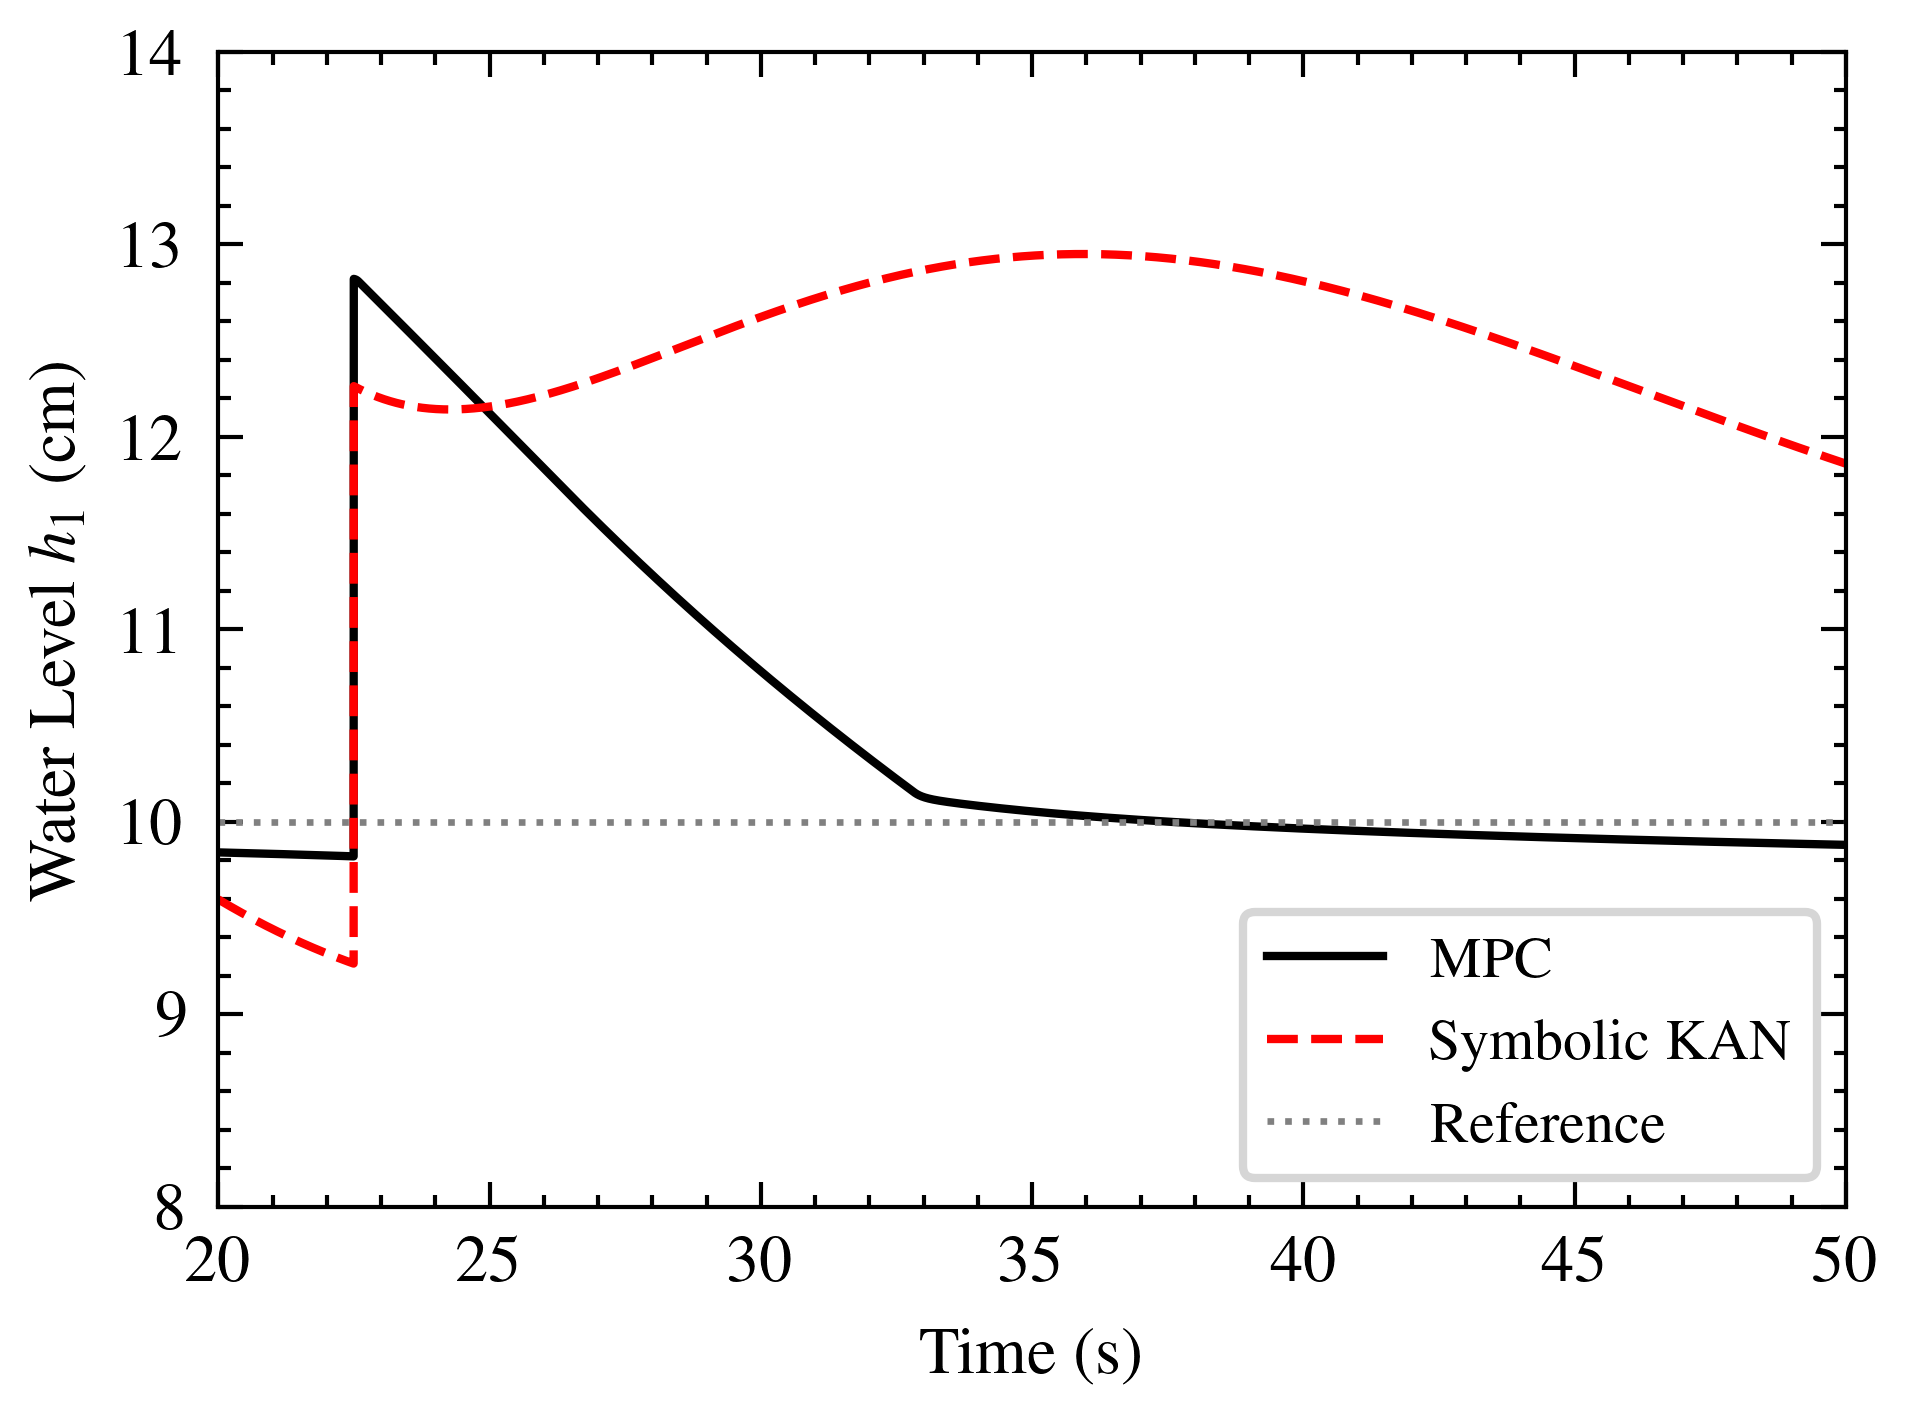

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import scienceplots  # This registers the styles
import numpy as np

# Define your HIL time step
dt_hil = 0.003  # 3ms

# 1. Load Data
df_mpc = pd.read_csv('DisturbanceHandling_MPC.csv')
df_kan = pd.read_csv('DisturbanceHandling_KAN.csv')

# Create the time vector based on the number of rows
df_mpc['time'] = np.arange(len(df_mpc)) * dt_hil
df_kan['time'] = np.arange(len(df_kan)) * dt_hil

# 2. Set the Style (The Magic Step)
# 'science' gives the professional look
# 'ieee' sets the correct column width and fonts (Times Roman)
plt.style.use(['science', 'ieee'])

# Optional: Force LaTeX rendering (makes math look beautiful)
# If this errors out, install MikTeX or just remove this line.
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Times"],
})

# 3. Create Figure
# IEEE Column width is ~3.5 inches.
# Aspect ratio 4:3 or 16:9 depending on vertical space.
fig, ax = plt.subplots(figsize=(3.5, 2.5))

# 4. Plotting (The "Money Shot" Disturbance Graph)
# Use thin lines (linewidth=0.8 - 1.0 is standard for IEEE)
ax.plot(df_mpc['time'], df_mpc['h1'], label='MPC', linestyle='-', color='black', linewidth=1)
ax.plot(df_kan['time'], df_kan['h1'], label='Symbolic KAN', linestyle='--', color='red', linewidth=1)

# Target Line
ax.axhline(10.0, color='gray', linestyle=':', linewidth=0.8, label='Reference')

# 5. Labeling
ax.set_xlabel('Time (s)')
ax.set_ylabel('Water Level $h_1$ (cm)') # Use LaTeX syntax for math
ax.legend(fontsize=7, frameon=True, loc='lower right') # Small font for legend
ax.set_xlim([20, 50]) # Zoom in on the disturbance
ax.set_ylim([8, 14])

# 6. Saving
# ALWAYS save as .pdf or .eps for LaTeX.
plt.savefig('Fig4_Disturbance_Rejection.pdf', dpi=300)
plt.show()

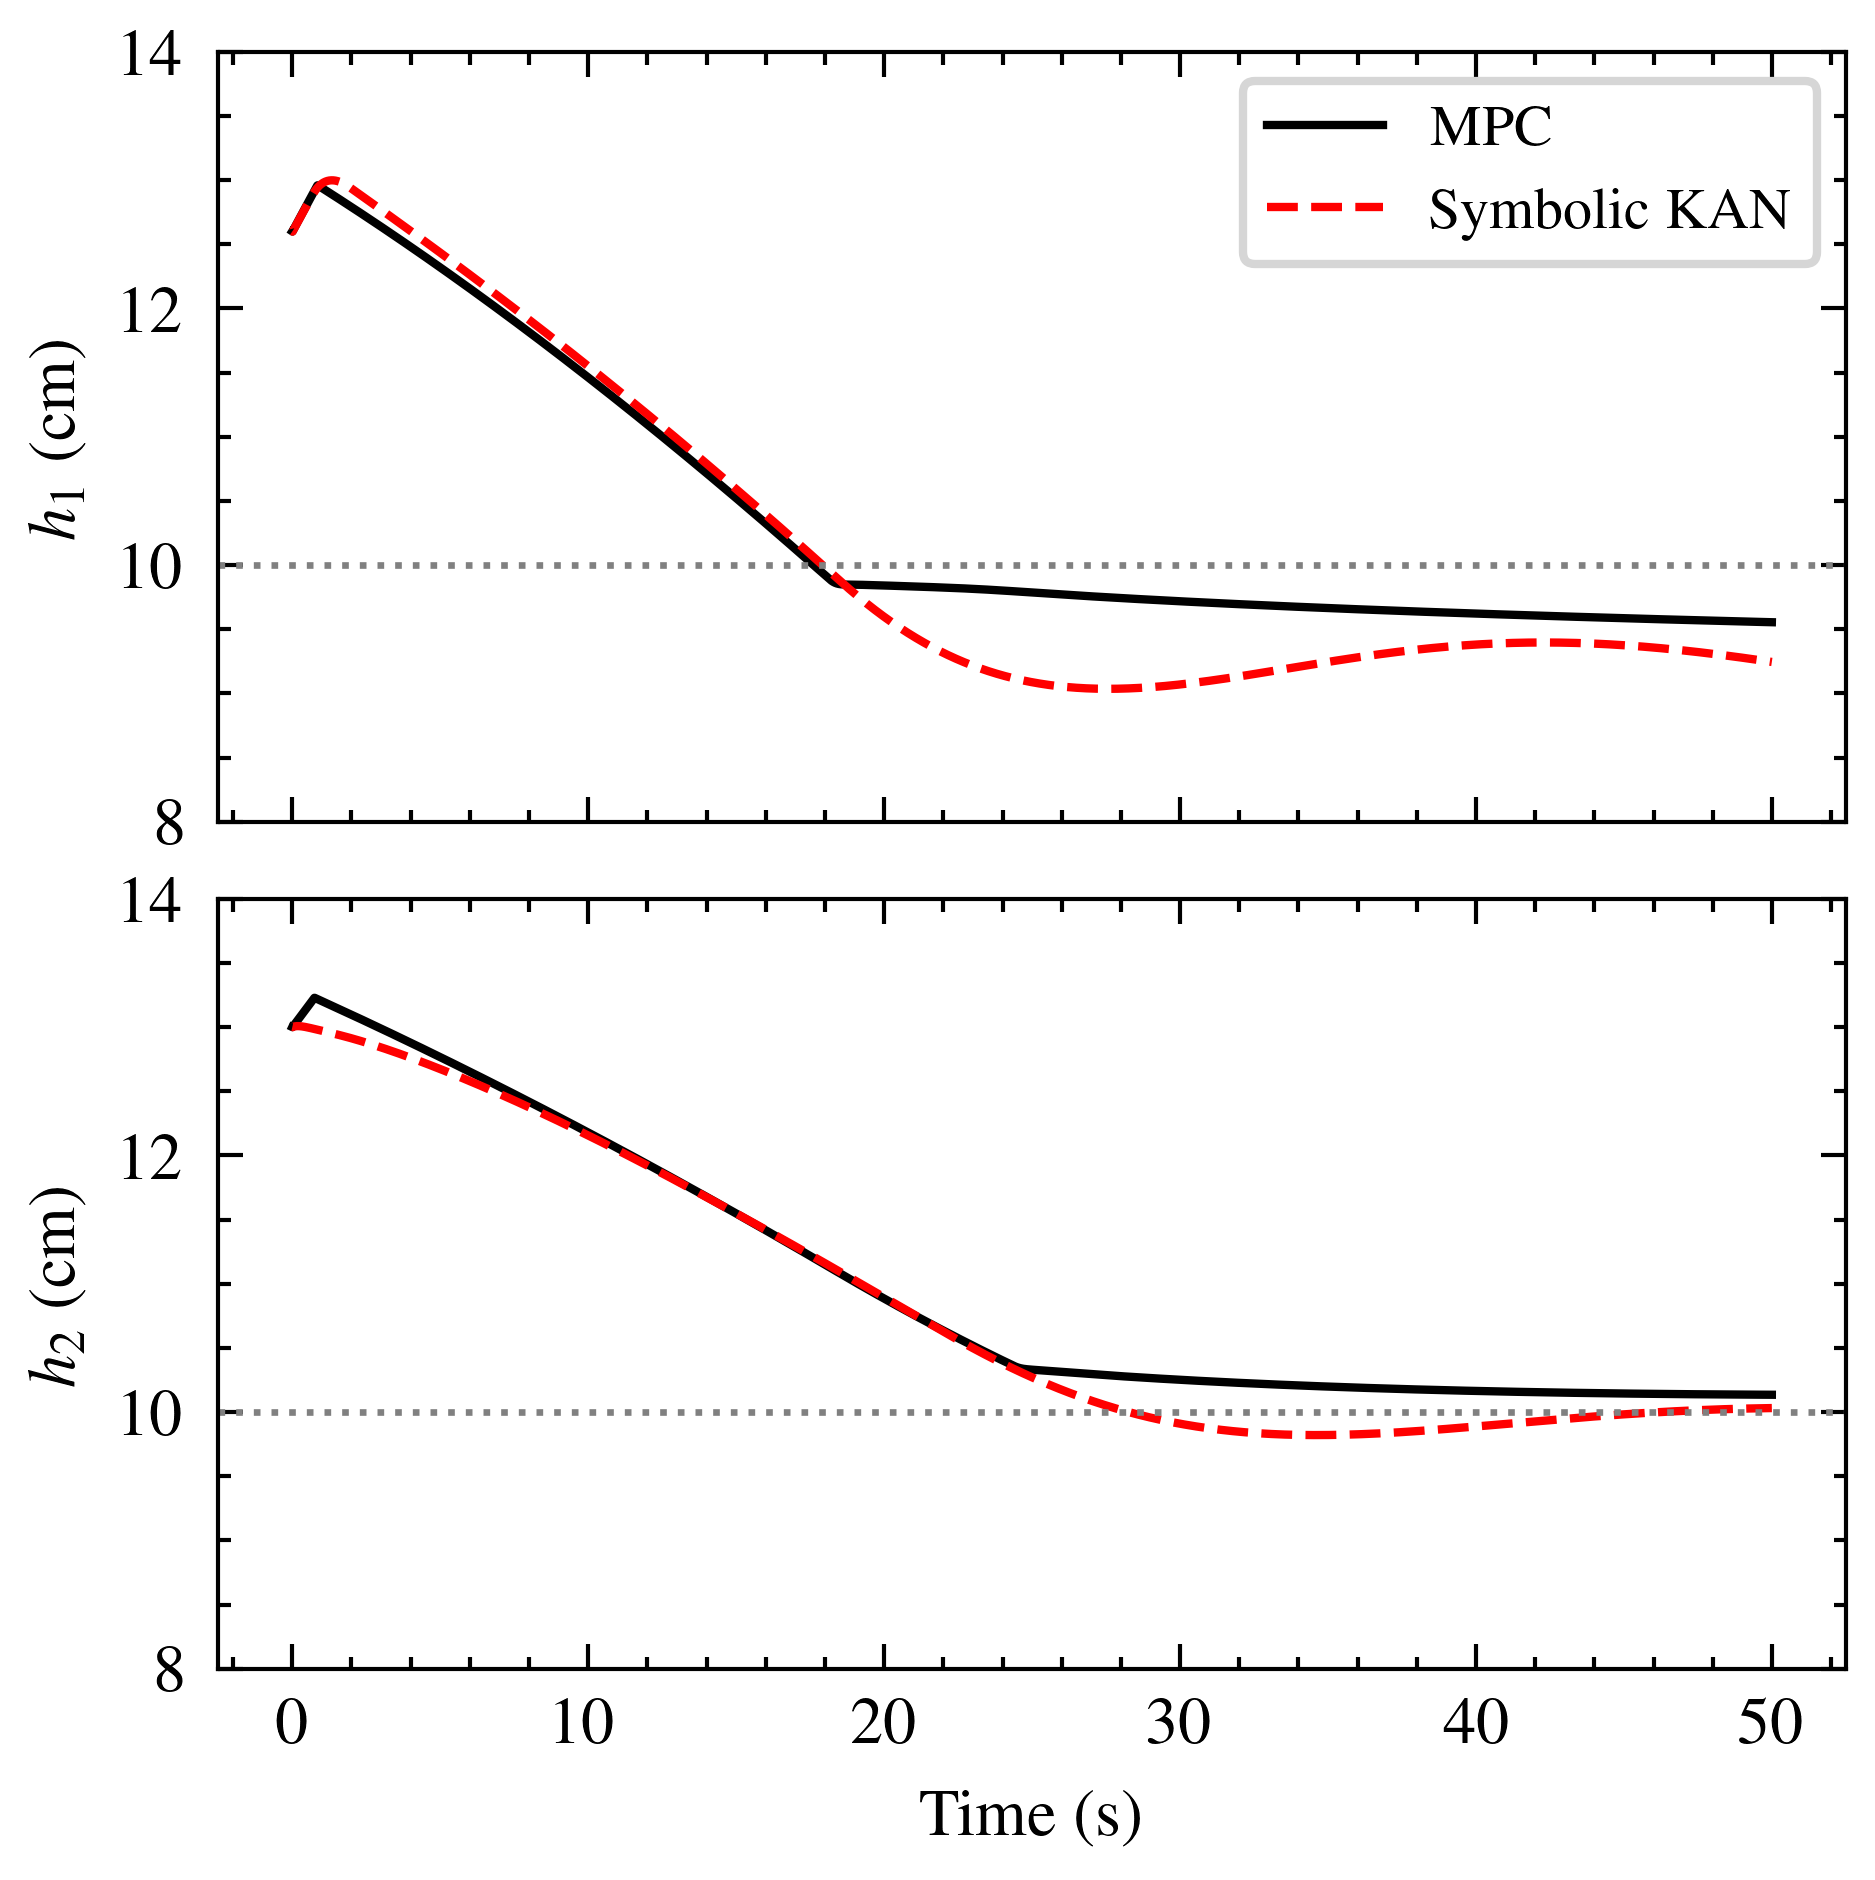

In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import scienceplots  # This registers the styles
import numpy as np

# Define HIL time step
dt_hil = 0.003  # 3ms
t = np.arange(len(df_mpc)) * dt_hil

# 1. Load Data
df_mpc = pd.read_csv('HIL_Data_CEMPC_NMP_STM32.csv')
df_kan = pd.read_csv('HIL_Data_KAN_NMP_STM32.csv')

# Create the time vector based on the number of rows
df_mpc['time'] = np.arange(len(df_mpc)) * dt_hil
df_kan['time'] = np.arange(len(df_kan)) * dt_hil

# 2. Set the Style (The Magic Step)
# 'science' gives the professional look
# 'ieee' sets the correct column width and fonts (Times Roman)
plt.style.use(['science', 'ieee'])

# Optional: Force LaTeX rendering (makes math look beautiful)
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Times"],
})

# 3. Create Figure
# IEEE Column width is ~3.5 inches.
# Aspect ratio 4:3 or 16:9 depending on vertical space.
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(3.5, 3.5), sharex=True)

# --- Subplot 1: Tank 1 ---
ax1.plot(t, df_mpc['h1'], label='MPC', linestyle='-', color='black', linewidth=1)
ax1.plot(t, df_kan['h1'], label='Symbolic KAN', linestyle='--', color='red', linewidth=1)
ax1.axhline(10.0, color='gray', linestyle=':', linewidth=0.8) # Reference
ax1.set_ylabel(r'$h_1$ (cm)')
ax1.set_ylim([8, 14]) # Adjust to fit data range closely
# Place legend inside the plot area to save space
ax1.legend(fontsize=7, frameon=True, loc='best')

# --- Subplot 2: Tank 2 ---
ax2.plot(t, df_mpc['h2'], linestyle='-', color='black', linewidth=1) # No label needed here
ax2.plot(t, df_kan['h2'], linestyle='--', color='red', linewidth=1)
ax2.axhline(10.0, color='gray', linestyle=':', linewidth=0.8) # Reference
ax2.set_ylabel(r'$h_2$ (cm)')
ax2.set_xlabel('Time (s)')
ax2.set_ylim([8, 14]) # Adjust as needed

# Tight layout handles the spacing
plt.subplots_adjust(hspace=0.1) # Reduce gap between plots

plt.savefig('Fig1_Tracking_Performance.pdf', dpi=300)
plt.show()

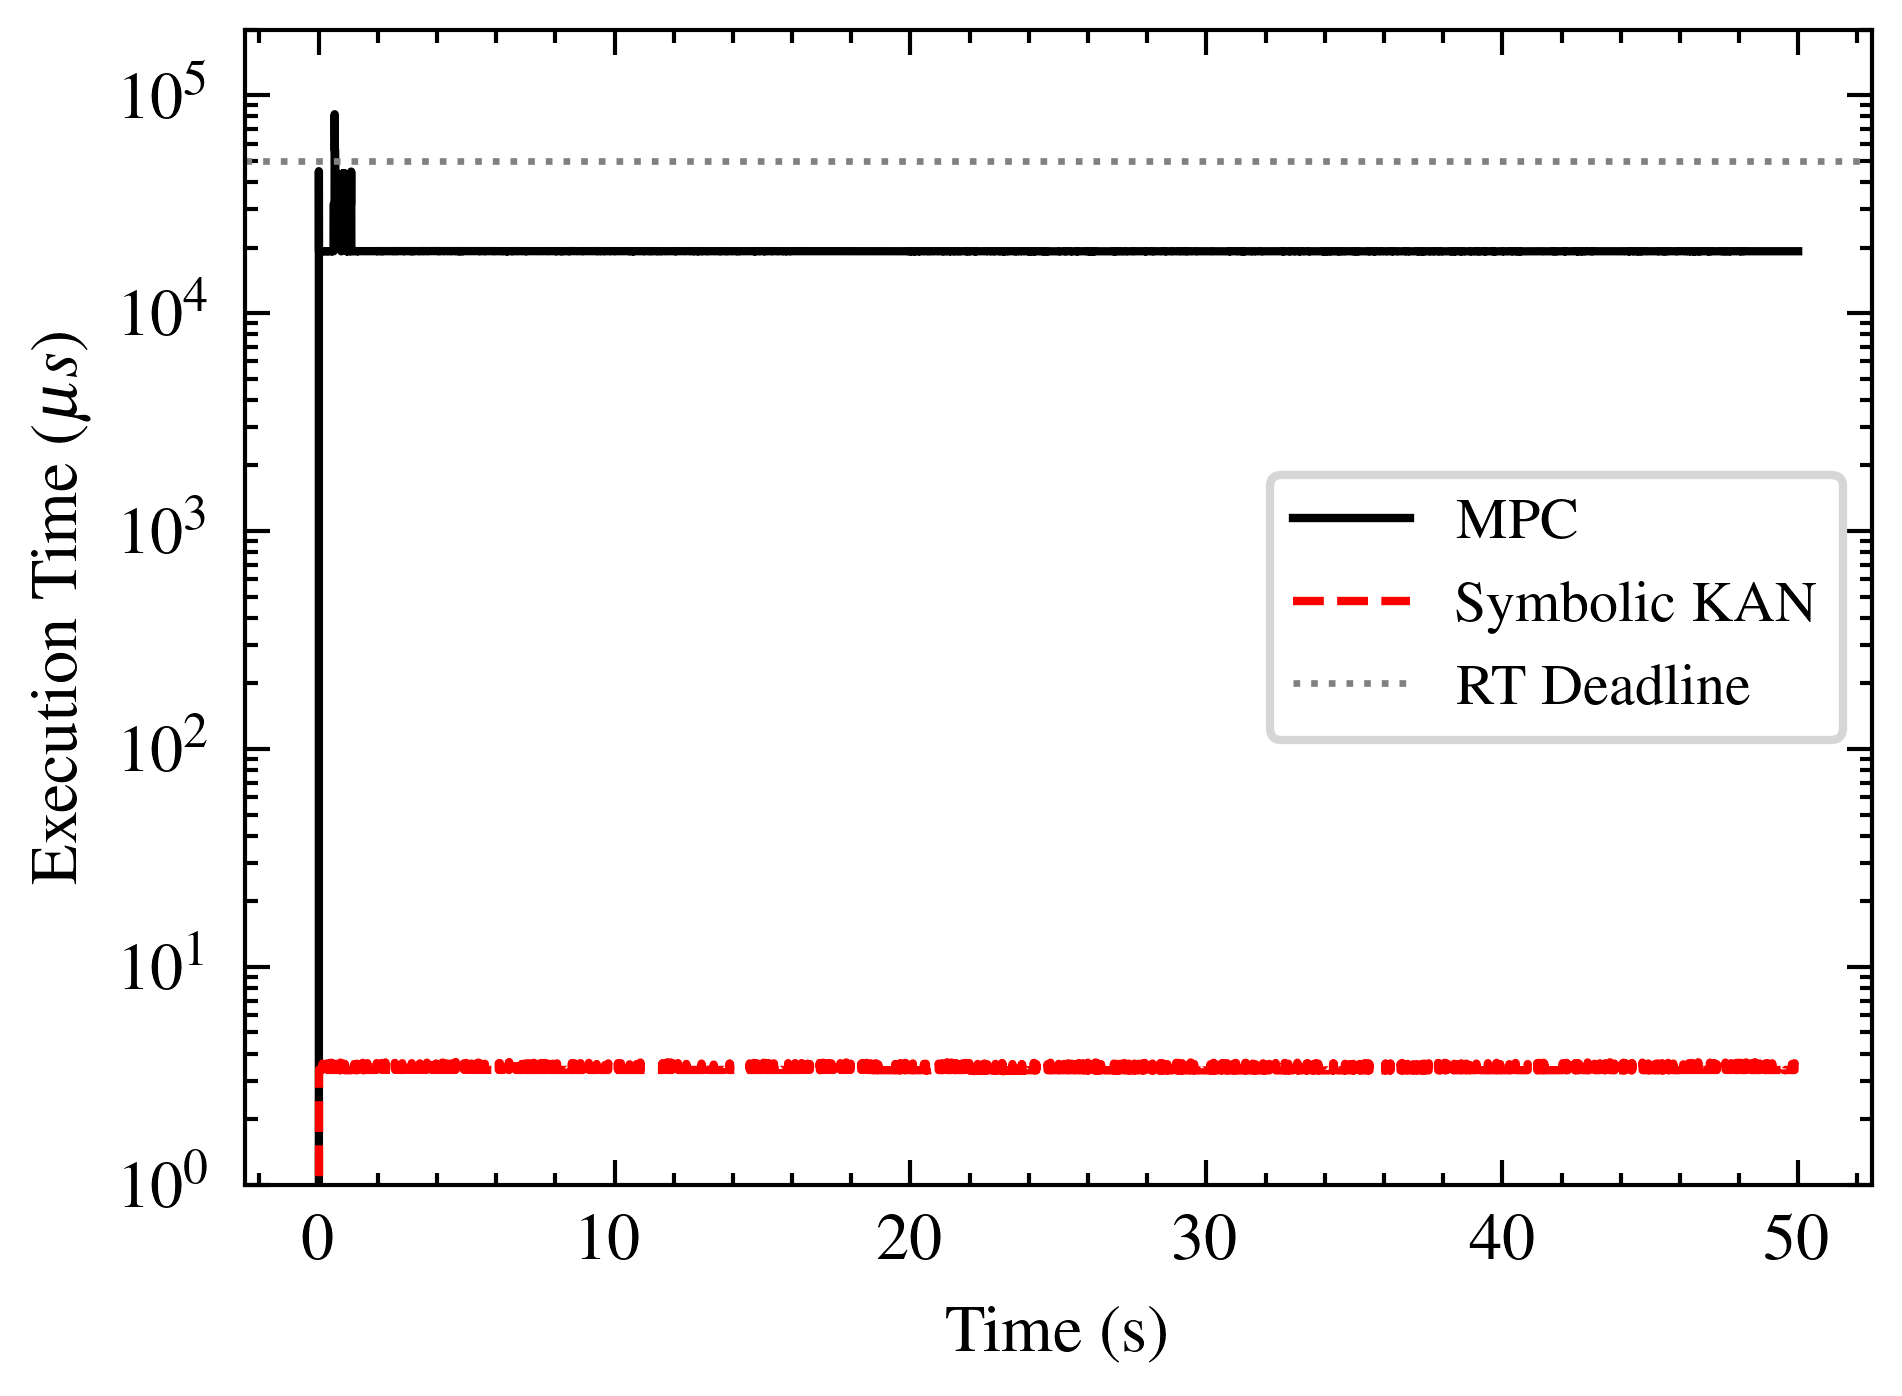

In [22]:
import matplotlib.pyplot as plt
import pandas as pd
import scienceplots  # This registers the styles
import numpy as np

plt.close('all')

# Define HIL time step
dt_hil = 0.003  # 3ms

# 1. Load Data
df_mpc = pd.read_csv('HIL_Data_CEMPC_NMP_STM32.csv')
df_kan = pd.read_csv('HIL_Data_KAN_NMP_STM32.csv')

# Create the time vector based on the number of rows
df_mpc['time'] = np.arange(len(df_mpc)) * dt_hil
df_kan['time'] = np.arange(len(df_kan)) * dt_hil

# 2. Set the Style (The Magic Step)
# 'science' gives the professional look
# 'ieee' sets the correct column width and fonts (Times Roman)
plt.style.use(['science', 'ieee'])

# Optional: Force LaTeX rendering (makes math look beautiful)
# If this errors out, install MikTeX or just remove this line.
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Times"],
})

# 3. Create Figure
# IEEE Column width is ~3.5 inches.
# Aspect ratio 4:3 or 16:9 depending on vertical space.
fig, ax = plt.subplots(figsize=(3.5, 2.5))

# 4. Plotting (The "Money Shot" Disturbance Graph)
# Use thin lines (linewidth=0.8 - 1.0 is standard for IEEE)
ax.plot(df_mpc['time'], df_mpc['t_exec'], label='MPC', linestyle='-', color='black', linewidth=1)
ax.plot(df_kan['time'], df_kan['t_exec'], label='Symbolic KAN', linestyle='--', color='red', linewidth=1)
ax.set_yscale('log')

# Labels
ax.set_ylabel(r'Execution Time ($\mu s$)') # Latex for Microseconds
ax.set_xlabel('Time (s)')

# Force Y-axis to start at 1 microsecond (10^0)
# This gives the Red line some "breathing room" from the bottom frame.
ax.set_ylim(bottom=1, top=200000) 

# Add the 50 ms Deadline - 20Hz
# 50ms = 50000 microseconds
ax.axhline(50000, color='gray', linestyle=':', linewidth=0.8, label='RT Deadline')

# Legend (Upper Right is usually empty in log plots)
ax.legend(fontsize=7, frameon=True, loc='best')

# 6. Saving
# ALWAYS save as .pdf or .eps for LaTeX.
plt.savefig('Fig3_Latency.pdf', dpi=300)
plt.show()